In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import torch
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Scatter Histogram
plot the observed pairwise distances between the groud truth and the generated point cloud:
- point-e single view 
- point-e multiple views 
- point-e multiple views with stochastic conditioning

In [ ]:
'''base_path = os.path.join("shapenet_texsin")
with open(os.path.join(base_path, 'eval_clouds_shapenet.pickle'), 'rb') as handle:
    d1 = pickle.load(handle)
base_path = os.path.join("modelnet_texsin")
with open(os.path.join(base_path, 'eval_clouds_modelnet_300M.pickle'), 'rb') as handle:
    d2 = pickle.load(handle)

# merge the two dictionaries
d3 = d1.copy()
for key, value in d2.items():
    d3[key] = value


# I keep only the values for generate the plot
    # 0: d_ground_single
    # 2: d_ground_multi
    # 4: d_single_multi
    # 6: ground_truth_pis
    # 7: single_view_pis
    # 8: multi_view_pis

all_data = [np.array([d3[i][j][1] for i in d3.keys()]) for j in [2, 4]]

# the random data
x = all_data[0]
y = all_data[1]


fig, ax = plt.subplots(figsize=(5.5, 5.5))

# the scatter plot:
ax.scatter(x, y)

# Set aspect of the main axes.
ax.set_aspect(1.)

# create new axes on the right and on the top of the current axes
divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1.2, pad=0.1, sharex=ax)
ax_histy = divider.append_axes("right", 1.2, pad=0.1, sharey=ax)

# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histy.yaxis.set_tick_params(labelleft=False)

# now determine nice limits by hand:
binwidth = 0.25
xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
lim = (int(xymax/binwidth) + 1)*binwidth

bins = np.arange(-lim, lim + binwidth, binwidth)
print(bins)
ax_histx.hist(x, bins=bins)
ax_histy.hist(y, bins=bins, orientation='horizontal')


#ax_histx.set_yticks([0, 50, 100])
#ax_histy.set_xticks([0, 50, 100])

plt.show()'''

# Box plots 
Those box plot portray visually the variances of the metrics between different techniques  

In [79]:
base_path = os.path.join("modelnet_texsin")
with open(os.path.join(base_path, 'eval_clouds_modelnet_300M.pickle'), 'rb') as handle:
    data = pickle.load(handle)

In [ ]:
data

In [24]:
# I keep only the values for generate the plot
    # 0: d_ground_single
    # 2: d_ground_multi
    # 4: d_single_multi
    # 6: ground_truth_pis
    # 7: single_view_pis
    # 8: multi_view_pis

[np.array([data[i][j][1] for i in data.keys()]) for j in [0, 2, 4, 6, 7, 8]]


[array([ 63.17218284,  87.98316257,  50.12974868,  65.12260126,
         87.08223774,  80.95726274,  43.36783045,  34.21788233,
         99.73480017,  38.22030629,  81.58812774,  55.81150129,
         80.30430019,  53.46943969,  71.38867869,  42.72872091,
         41.99676532,  78.71368789,  63.1956195 ,  44.65180295,
        112.30570904,  42.68137034,  64.27061933,  62.05965258,
         58.71574181,  57.16287686, 249.05055888,  68.91615085,
         40.78433066, 108.35024864,  76.66645712,  53.48833479,
         56.84042417,  45.43670297,  71.09396538,  42.44261017,
         37.41797372,  54.9938653 ,  71.8412008 ,  60.08690652]),
 array([203.47730531,  82.08056935,  68.07494954, 123.31994421,
         78.81934723, 251.1532057 ,  76.6355298 ,  47.5928489 ,
        126.79060845,  54.34450123,  69.0099344 ,  84.42332353,
        106.78845471, 104.3135239 , 188.56624503,  74.76783955,
         89.44519393, 124.88374031,  80.68905541,  65.35947708,
         91.74264998,  95.10963244,  5

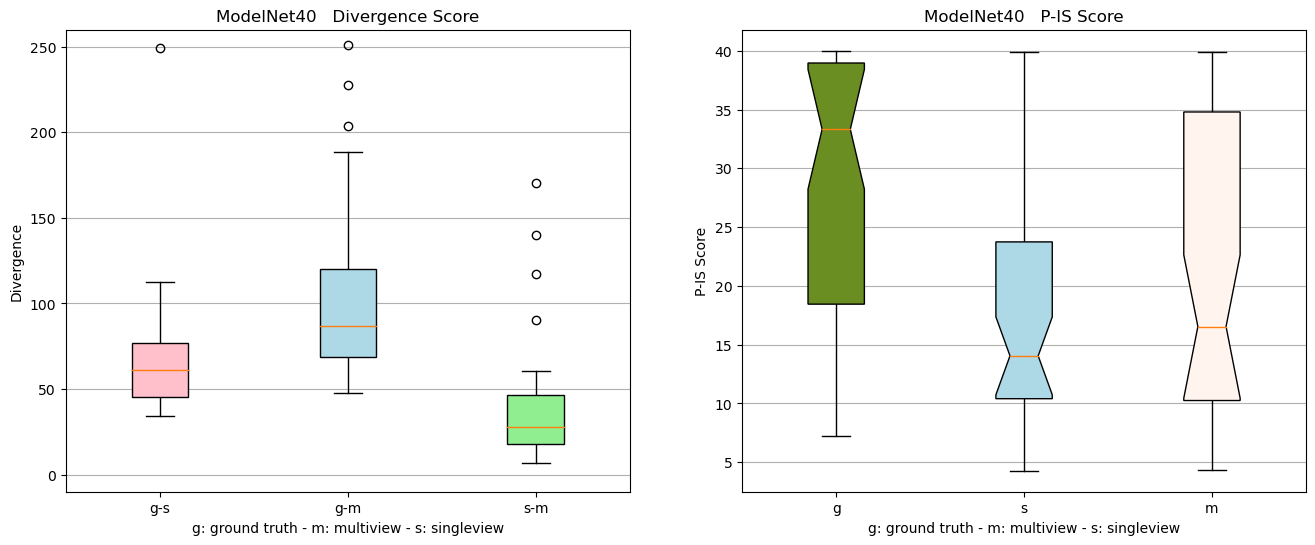

In [80]:
# Random test data
all_data = [np.array([data[i][j][1] for i in data.keys()]) for j in [0, 2, 4, 6, 7, 8]]
labels_plt1 = ['g-s', 'g-m', 's-m']
labels_plt2 = ['g', 's', 'm']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# rectangular box plot
bplot1 = ax1.boxplot(all_data[:3],
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels_plt1)  # will be used to label x-ticks
ax1.set_title('ModelNet40   Divergence Score')

# notch shape box plot
bplot2 = ax2.boxplot(all_data[3:],
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels_plt2)  # will be used to label x-ticks
ax2.set_title('ModelNet40   P-IS Score')

# fill with colors
c1 = ['pink', 'lightblue', 'lightgreen']
c2 = ['olivedrab', 'lightblue', 'seashell']

for bplot, colors in ((bplot1, c1), (bplot2, c2)):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
ax1.yaxis.grid(True)
ax1.set_xlabel('g: ground truth - m: multiview - s: singleview')
ax1.set_ylabel('Divergence')
ax1.set_ylim([-10, 260])

ax2.yaxis.grid(True)
ax2.set_xlabel('g: ground truth - m: multiview - s: singleview')
ax2.set_ylabel('P-IS Score')

plt.show()

In [81]:
base_path = os.path.join("shapenet_texsin")
with open(os.path.join(base_path, 'eval_clouds_shapenet.pickle'), 'rb') as handle:
    data = pickle.load(handle)

In [66]:
# I keep only the values for generate the plot
    # 0: d_ground_single
    # 2: d_ground_multi
    # 4: d_single_multi
    # 6: ground_truth_pis
    # 7: single_view_pis
    # 8: multi_view_pis

[np.array([data[i][j][1] for i in data.keys()]) for j in [0, 2, 4, 6, 7, 8]]


[array([22.6123037 ,  7.95801823,  4.26120535,  2.27067861, 11.87054362,
        62.40556325,  7.85693925, 20.0930553 ,  2.03952851,  2.8718534 ,
         6.76226046, 26.39178921, 74.19962805, 23.35370137, 34.34292111,
        17.81135719,  3.26546233,  4.40824084,  6.76230641, 27.8484297 ,
        27.86650166, 10.19348011,  8.12223071, 52.5570803 ,  9.73626771,
        11.31967428,  1.85624808, 12.32121011,  0.88141816,  5.93668069,
         6.0467855 , 13.17547662,  4.63128078,  5.61871733, 12.04020306,
        10.78700619,  4.83979314,  5.33520718, 10.1228974 , 21.79886781,
         2.53781321, 14.42420283,  7.84146618,  4.3987665 ,  7.00016661,
         6.75911439,  6.13659458, 78.02805611, 11.90431854,  3.31592412,
         4.31240334, 14.68335016,  9.64076412,  2.48553417, 12.94440201]),
 array([  9.82898607,  15.60693203,   4.40302747,  11.45204956,
         14.34808307,  47.16554447,  18.40534816,   3.07665347,
         22.74599959,  32.86284697,  35.64446064,  64.4567459 ,
   

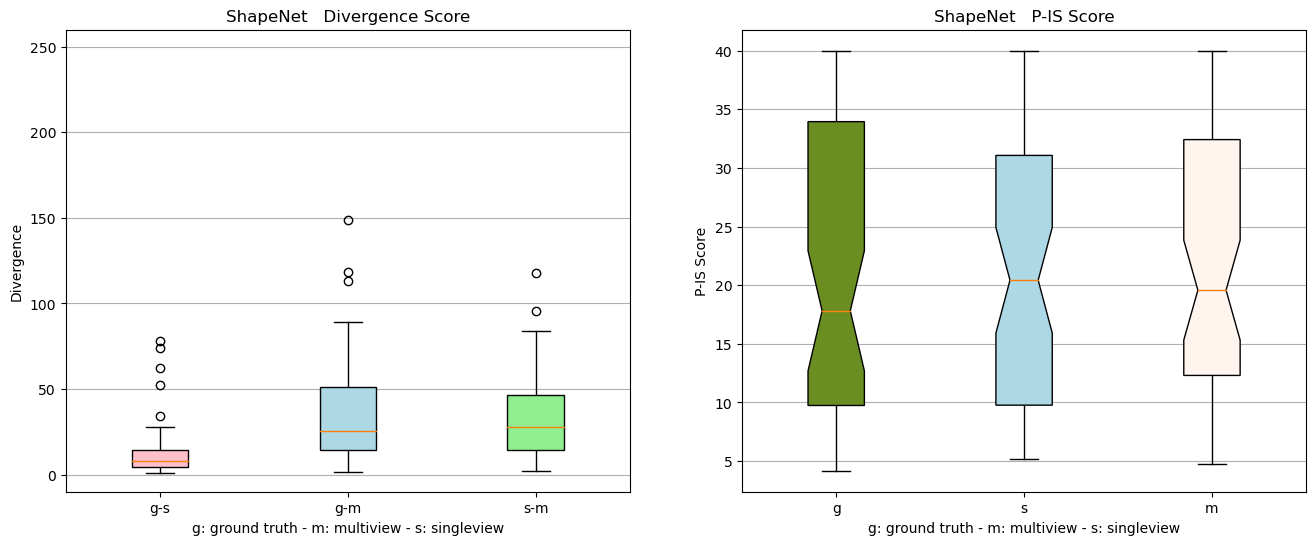

In [82]:
# Random test data
all_data = [np.array([data[i][j][1] for i in data.keys()]) for j in [0, 2, 4, 6, 7, 8]]
labels_plt1 = ['g-s', 'g-m', 's-m']
labels_plt2 = ['g', 's', 'm']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# rectangular box plot
bplot1 = ax1.boxplot(all_data[:3],
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels_plt1)  # will be used to label x-ticks
ax1.set_title('ShapeNet   Divergence Score')

# notch shape box plot
bplot2 = ax2.boxplot(all_data[3:],
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels_plt2)  # will be used to label x-ticks
ax2.set_title('ShapeNet   P-IS Score')

# fill with colors
c1 = ['pink', 'lightblue', 'lightgreen']
c2 = ['olivedrab', 'lightblue', 'seashell']

for bplot, colors in ((bplot1, c1), (bplot2, c2)):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
ax1.yaxis.grid(True)
ax1.set_xlabel('g: ground truth - m: multiview - s: singleview')
ax1.set_ylabel('Divergence')
ax1.set_ylim([-10, 260])

ax2.yaxis.grid(True)
ax2.set_xlabel('g: ground truth - m: multiview - s: singleview')
ax2.set_ylabel('P-IS Score')

plt.show()

**Perform the boxplot across modelnet and shapenet**

In [134]:
base_path = os.path.join("shapenet_texsin")
with open(os.path.join(base_path, 'eval_clouds_shapenet_300M.pickle'), 'rb') as handle:
    d1 = pickle.load(handle)
base_path = os.path.join("modelnet_texsin")
with open(os.path.join(base_path, 'eval_clouds_modelnet_300M.pickle'), 'rb') as handle:
    d2 = pickle.load(handle)

# merge the two dictionaries
d3 = d1.copy()
for key, value in d2.items():
    d3[key] = value

In [73]:
d3.keys()

dict_keys(['03325088', '02946921', '03636649', '03761084', '03001627', '04004475', '02691156', '02942699', '02958343', '03938244', '03991062', '03046257', '04090263', '02880940', '03261776', '04225987', '04074963', '02843684', '03207941', '02801938', '02876657', '03710193', '02871439', '03085013', '03337140', '03790512', '02818832', '04401088', '04379243', '03642806', '02828884', '02773838', '04330267', '03593526', '04554684', '02933112', '03948459', '02954340', '03759954', '03691459', '03513137', '03797390', '04460130', '03928116', '02834778', '04468005', '02924116', '03211117', '03624134', '04099429', '02808440', '03467517', '02747177', '04530566', '04256520', 'radio', 'cup', 'wardrobe', 'vase', 'person', 'range_hood', 'sink', 'table', 'guitar', 'bed', 'piano', 'tent', 'door', 'lamp', 'plant', 'monitor', 'tv_stand', 'curtain', 'laptop', 'bathtub', 'dresser', 'glass_box', 'xbox', 'car', 'flower_pot', 'chair', 'bottle', 'stairs', 'bowl', 'stool', 'night_stand', 'bookshelf', 'bench', 't

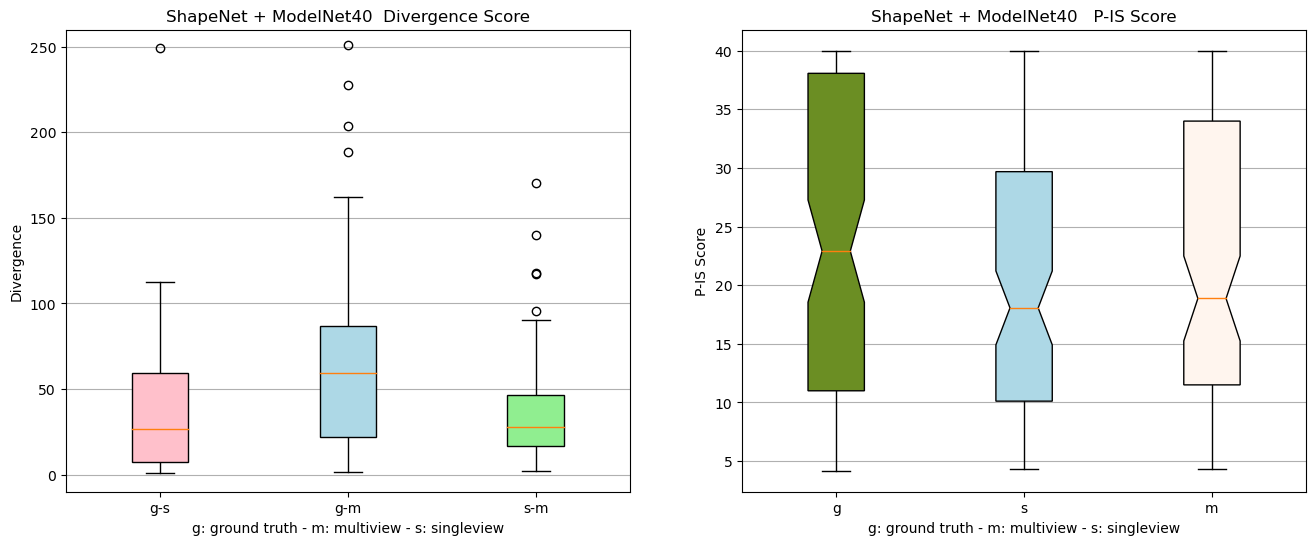

In [136]:
# Random test data
all_data = [np.array([d3[i][j][1] for i in d3.keys()]) for j in [0, 2, 4, 6, 7, 8]]
labels_plt1 = ['g-s', 'g-m', 's-m']
labels_plt2 = ['g', 's', 'm']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# rectangular box plot
bplot1 = ax1.boxplot(all_data[:3],
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels_plt1)  # will be used to label x-ticks
ax1.set_title('ShapeNet + ModelNet40  Divergence Score')

# notch shape box plot
bplot2 = ax2.boxplot(all_data[3:],
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels_plt2)  # will be used to label x-ticks
ax2.set_title('ShapeNet + ModelNet40   P-IS Score')

# fill with colors
c1 = ['pink', 'lightblue', 'lightgreen']
c2 = ['olivedrab', 'lightblue', 'seashell']

for bplot, colors in ((bplot1, c1), (bplot2, c2)):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
ax1.yaxis.grid(True)
ax1.set_xlabel('g: ground truth - m: multiview - s: singleview')
ax1.set_ylabel('Divergence')
ax1.set_ylim([-10, 260])

ax2.yaxis.grid(True)
ax2.set_xlabel('g: ground truth - m: multiview - s: singleview')
ax2.set_ylabel('P-IS Score')

plt.show()

In [32]:
[np.array([data[i][j][1] for i in data.keys()]) for j in [0, 2, 4, 6, 7, 8]][3].shape

(40,)

# Scatter of the distributions of the pairwise distances of the points


In [92]:
base_path = os.path.join("shapenet_texsin")
with open(os.path.join(base_path, 'eval_clouds_shapenet.pickle'), 'rb') as handle:
    data = pickle.load(handle)


d=[np.array([data[i][j][1] for i in data.keys()]) for j in [0, 2, 4, 6, 7, 8]]
data[list(data.keys())[list(d[1]).index(min(list(d[1])))]]

[('d_ground_single', 5.618717329269884),
 ('ground_truth_single_view',
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1945x683>),
 ('d_ground_multi', 1.669261281733725),
 ('ground_truth_multi_view',
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1945x683>),
 ('d_single_multi', 6.515610412094475),
 ('single_multi_view',
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1945x683>),
 ('ground_truth_pis', 19.088615),
 ('single_view_pis', 35.739857),
 ('single_view_pis', 25.052292),
 ('ground_truth_cloud',
  tensor([[ 0.0897, -0.3080, -0.1407],
          [ 0.1570, -0.1622, -0.0688],
          [-0.0602,  0.0268,  0.1553],
          ...,
          [-0.1488, -0.0200,  0.0664],
          [-0.0390, -0.2827, -0.1483],
          [-0.0505, -0.2201,  0.1645]])),
 ('g_single_view_cloud',
  tensor([[ 1.3008e-01,  1.4482e-01, -1.3390e-01,  1.4108e+02,  1.2716e+02,
            1.5460e+02],
          [-1.5841e-01,  8.4589e-02, -4.3602e-01,  1.3647e+02,  8.7621e+01,
            

In [97]:
data[list(data.keys())[list(d[1]).index(min(list(d[1])))]][11]

('g_multi_view_cloud',
 tensor([[ 1.5585e-01,  3.6777e-02,  1.7892e-01,  1.3625e+02,  1.4261e+02,
           1.5545e+02],
         [ 9.1081e-02, -1.2780e-01, -1.0866e-01,  1.2095e+02,  1.0339e+02,
           1.3110e+02],
         [ 1.5454e-01,  1.4647e-02, -1.3581e-01,  1.1833e+02,  9.9031e+01,
           1.2854e+02],
         ...,
         [-1.4638e-02,  1.6143e-01,  2.7871e-01,  1.3771e+02,  1.6534e+02,
           1.6607e+02],
         [ 1.5291e-01,  3.4464e-02,  2.7312e-01,  1.3958e+02,  1.8859e+02,
           1.7549e+02],
         [-6.0809e-02, -1.1512e-01, -4.3747e-01,  1.2493e+02,  5.4623e+01,
           1.1784e+02]]))

In [100]:
data[list(data.keys())[list(d[1]).index(min(list(d[1])))]][9]

('ground_truth_cloud',
 tensor([[ 0.0897, -0.3080, -0.1407],
         [ 0.1570, -0.1622, -0.0688],
         [-0.0602,  0.0268,  0.1553],
         ...,
         [-0.1488, -0.0200,  0.0664],
         [-0.0390, -0.2827, -0.1483],
         [-0.0505, -0.2201,  0.1645]]))

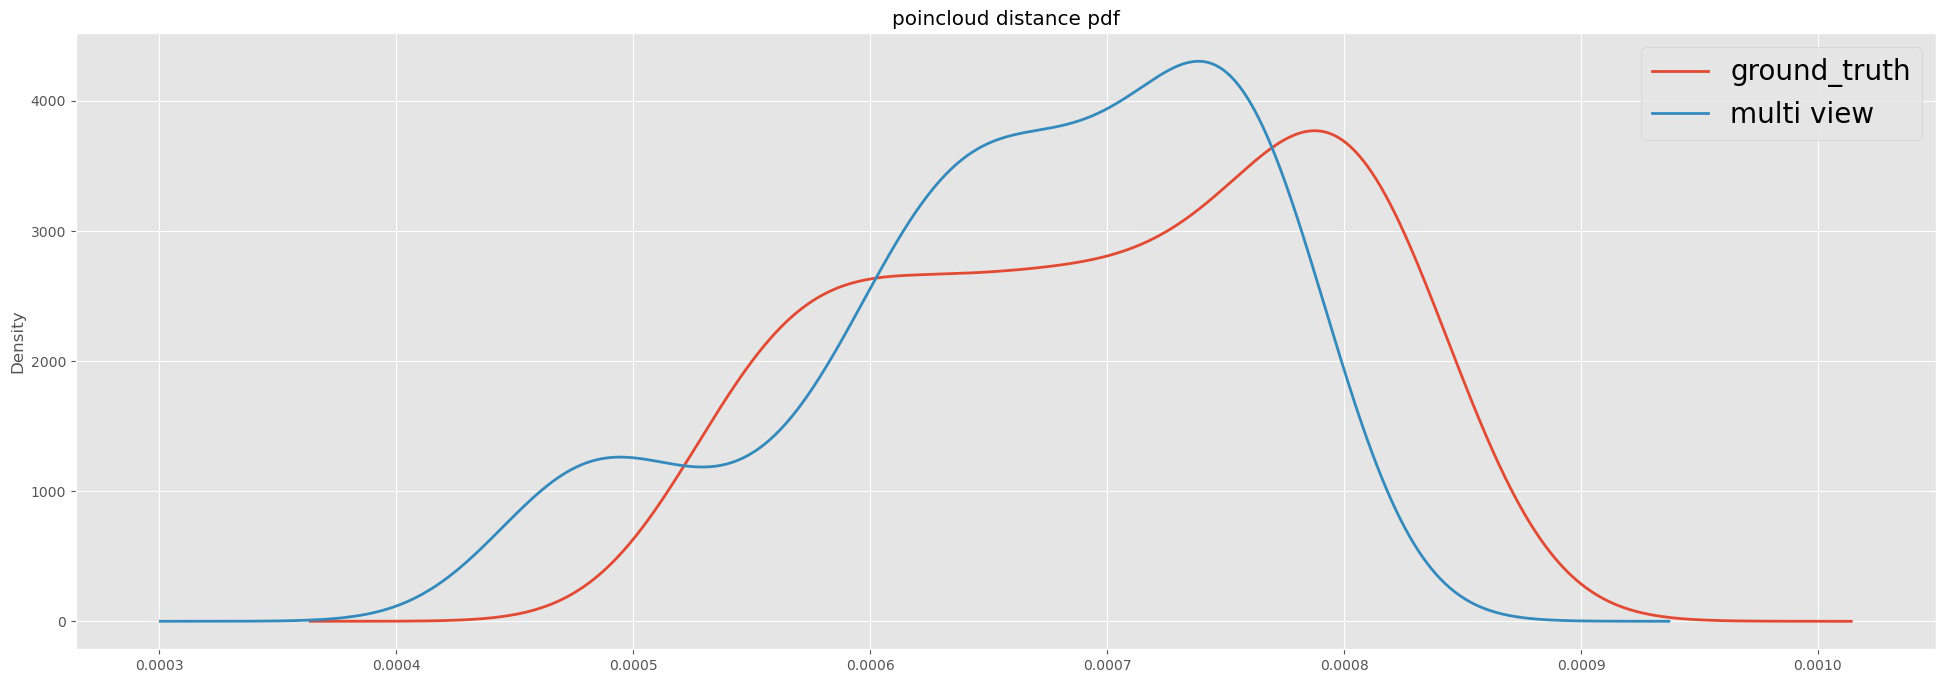

In [124]:
data[list(data.keys())[list(d[1]).index(min(list(d[1])))]][3][1]

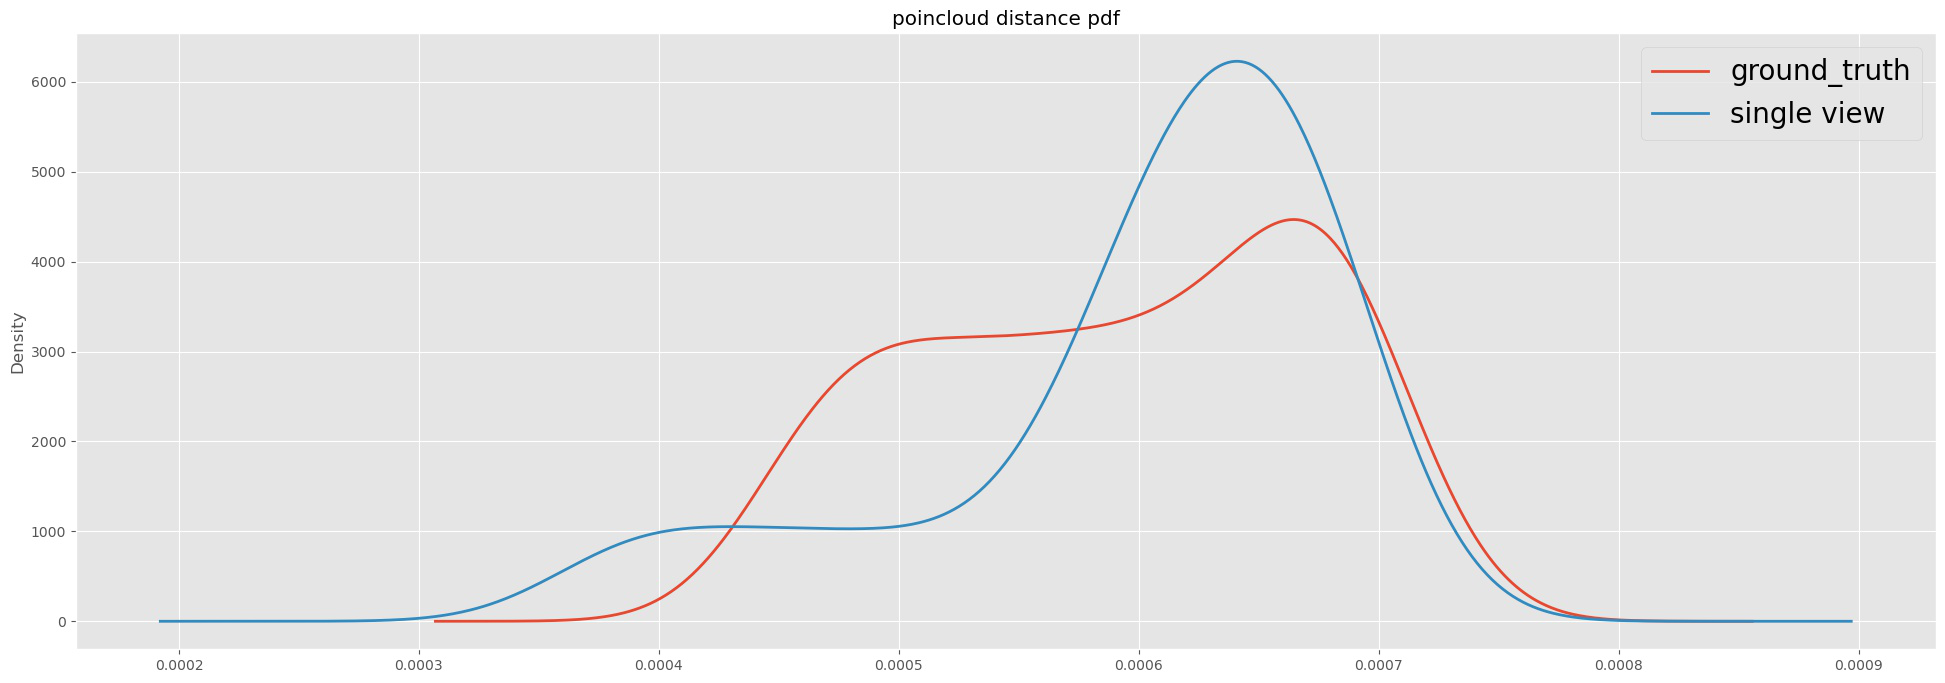

In [125]:
data[list(data.keys())[list(d[1]).index(min(list(d[1])))]][1][1]

# The P-IS does not correlate with the divergence

- ?maybe because we do not run ours tests on tons of objects
- the divergence better in single view

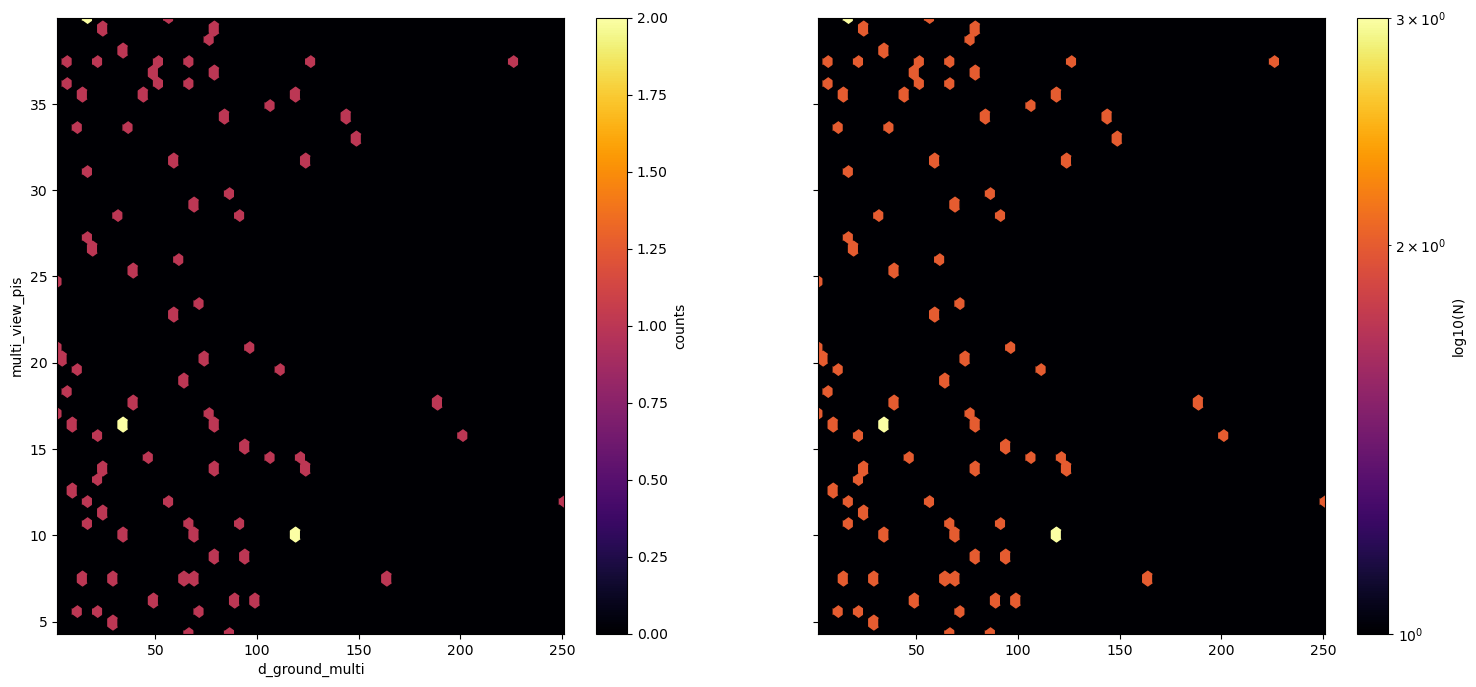

In [132]:
base_path = os.path.join("shapenet_texsin")
with open(os.path.join(base_path, 'eval_clouds_shapenet.pickle'), 'rb') as handle:
    d1 = pickle.load(handle)
base_path = os.path.join("modelnet_texsin")
with open(os.path.join(base_path, 'eval_clouds_modelnet_300M.pickle'), 'rb') as handle:
    d2 = pickle.load(handle)

# merge the two dictionaries
d3 = d1.copy()
for key, value in d2.items():
    d3[key] = value


# I keep only the values for generate the plot
    # 0: d_ground_single
    # 2: d_ground_multi
    # 4: d_single_multi
    # 6: ground_truth_pis
    # 7: single_view_pis
    # 8: multi_view_pis

all_data = [np.array([d3[i][j][1] for i in d3.keys()]) for j in [2, 8]]


x = all_data[0]
y = all_data[1]



xlim = x.min(), x.max()
ylim = y.min(), y.max()

fig, (ax0, ax1) = plt.subplots(ncols=2, sharey=True, figsize=(18, 8))

hb = ax0.hexbin(x, y, gridsize=50, cmap='inferno')
ax0.set(xlim=xlim, ylim=ylim)
ax0.set_ylabel('multi_view_pis')
ax0.set_xlabel('d_ground_multi')

cb = fig.colorbar(hb, ax=ax0, label='counts')

hb = ax1.hexbin(x, y, gridsize=50, bins='log', cmap='inferno')
ax1.set(xlim=xlim, ylim=ylim)

cb = fig.colorbar(hb, ax=ax1, label='log10(N)')

plt.show()


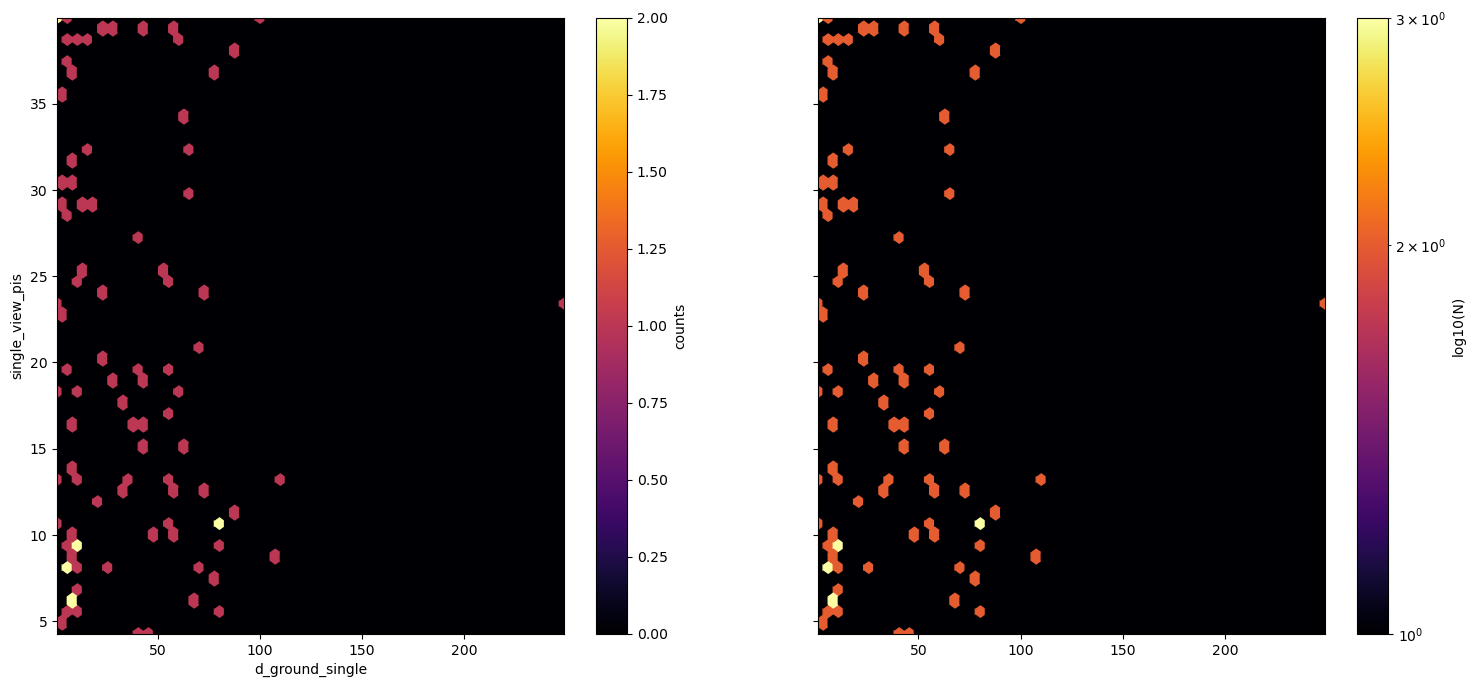

In [131]:
base_path = os.path.join("shapenet_texsin")
with open(os.path.join(base_path, 'eval_clouds_shapenet.pickle'), 'rb') as handle:
    d1 = pickle.load(handle)
base_path = os.path.join("modelnet_texsin")
with open(os.path.join(base_path, 'eval_clouds_modelnet_300M.pickle'), 'rb') as handle:
    d2 = pickle.load(handle)

# merge the two dictionaries
d3 = d1.copy()
for key, value in d2.items():
    d3[key] = value


# I keep only the values for generate the plot
    # 0: d_ground_single
    # 2: d_ground_multi
    # 4: d_single_multi
    # 6: ground_truth_pis
    # 7: single_view_pis
    # 8: multi_view_pis

all_data = [np.array([d3[i][j][1] for i in d3.keys()]) for j in [0, 7]]


x = all_data[0]
y = all_data[1]



xlim = x.min(), x.max()
ylim = y.min(), y.max()

fig, (ax0, ax1) = plt.subplots(ncols=2, sharey=True, figsize=(18, 8))

hb = ax0.hexbin(x, y, gridsize=50, cmap='inferno')
ax0.set(xlim=xlim, ylim=ylim)
ax0.set_ylabel('single_view_pis')
ax0.set_xlabel('d_ground_single')

cb = fig.colorbar(hb, ax=ax0, label='counts')

hb = ax1.hexbin(x, y, gridsize=50, bins='log', cmap='inferno')
ax1.set(xlim=xlim, ylim=ylim)

cb = fig.colorbar(hb, ax=ax1, label='log10(N)')

plt.show()